<a href="https://colab.research.google.com/github/felipeddragon/dashboard-vendas/blob/main/notebooks/Dashboard_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ===============================
# 1. Importar bibliotecas
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


# Configs visuais
sns.set(style="whitegrid")

In [7]:
# ===============================
# 2. Importar Arquivo
# ===============================
from google.colab import files

# Enviar arquivo CSV
uploaded = files.upload()

Saving Zara_Sales_Analysis.csv to Zara_Sales_Analysis (1).csv


In [8]:
# ===============================
# 3. Carregar dataset
# ===============================
df = pd.read_csv("Zara_Sales_Analysis.csv", sep=";")

print("Dataset carregado com sucesso!")


Dataset carregado com sucesso!


In [9]:
# ===============================
# 4. Limpeza de dados
# ===============================
# Remover duplicatas
df = df.drop_duplicates()

# Remover linhas com valores ausentes
df = df.dropna()

# Normalizar nomes de coluna (remover espaços)
df.columns = df.columns.str.strip()

# Converter colunas numéricas
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["Sales Volume"] = pd.to_numeric(df["Sales Volume"], errors="coerce")

# Remover linhas com Sales Volume ou price nulos
df = df.dropna(subset=["Sales Volume", "price"]).copy()

print("Dados limpos com sucesso!")
print(df.info())

Dados limpos com sucesso!
<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        250 non-null    int64  
 1   Product Position  250 non-null    object 
 2   Promotion         250 non-null    object 
 3   Product Category  250 non-null    object 
 4   Seasonal          250 non-null    object 
 5   Sales Volume      250 non-null    int64  
 6   brand             250 non-null    object 
 7   url               250 non-null    object 
 8   sku               250 non-null    object 
 9   name              250 non-null    object 
 10  description       250 non-null    object 
 11  price             250 non-null    float64
 12  currency          250 non-null    object 
 13  scraped_at        250 non-null    object 
 14  terms             250 non-null    object 
 15  section           250 non-null    object 
dtypes: float64(1), int64(2)

In [11]:
# ===============================
# 5. Criar coluna de Receita
# ===============================
df["Revenue"] = df["price"] * df["Sales Volume"]

# Exibir top 5 produtos por receita
top5 = df.sort_values(by="Revenue", ascending=False).head(5)
print("Top 5 produtos por receita:")
display(top5[["name", "Product Category", "Revenue"]])


Top 5 produtos por receita:


,name,Product Category,Revenue
38,SUEDE JACKET,Clothing,649140.0
87,LONGLINE QUILTED JACKET,Clothing,481481.0
67,WOOL BLEND TEXTURED JACKET,Clothing,447174.0
169,CASHMERE BLEND KNIT SWEATER,Clothing,434668.0
4,DOUBLE FACED JACKET,Clothing,408938.0


In [12]:
# ===============================
# 6. Indicadores rápidos
# ===============================
total_vendas = int(df["Sales Volume"].sum())
total_receita = float(df["Revenue"].sum())
preco_medio = float(df["price"].mean())

print(f"💸 Receita Total: R$ {total_receita:,.2f}")
print(f"📦 Total de Unidades Vendidas: {total_vendas:,}")
print(f"🏷️ Preço Médio: R$ {preco_medio:,.2f}")


💸 Receita Total: R$ 38,099,853.48
📦 Total de Unidades Vendidas: 455,556
🏷️ Preço Médio: R$ 85.23


/tmp/ipython-input-3498618546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_vendas.values, y=top10_vendas.index, palette="viridis")


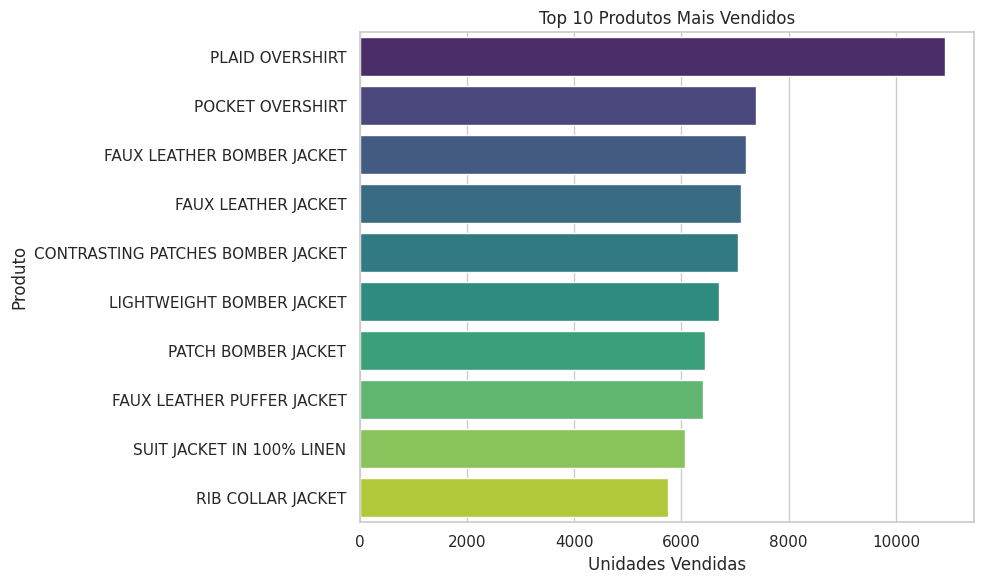

In [13]:
# ===============================
# 7. Top 10 produtos por volume
# ===============================
top10_vendas = df.groupby("name")["Sales Volume"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_vendas.values, y=top10_vendas.index, palette="viridis")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1484519020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_revenue, x="Revenue", y="name", palette="magma")


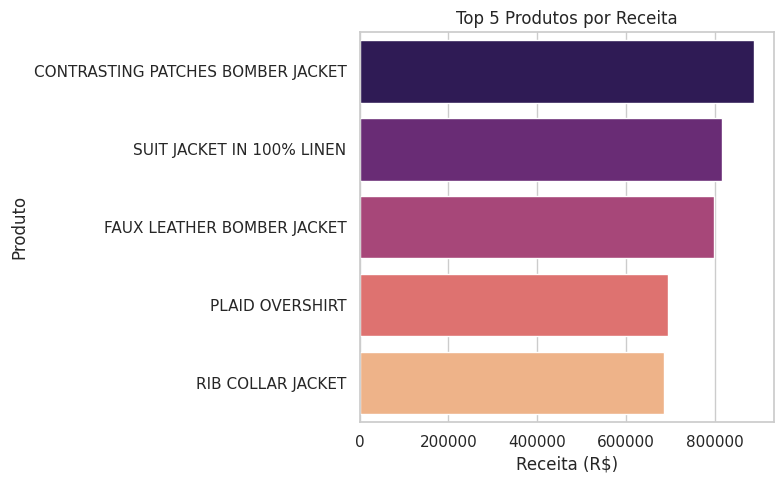

In [14]:
# ===============================
# 8. Top 5 por receita
# ===============================
top5_revenue = df.groupby("name")["Revenue"].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top5_revenue, x="Revenue", y="name", palette="magma")
plt.title("Top 5 Produtos por Receita")
plt.xlabel("Receita (R$)")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

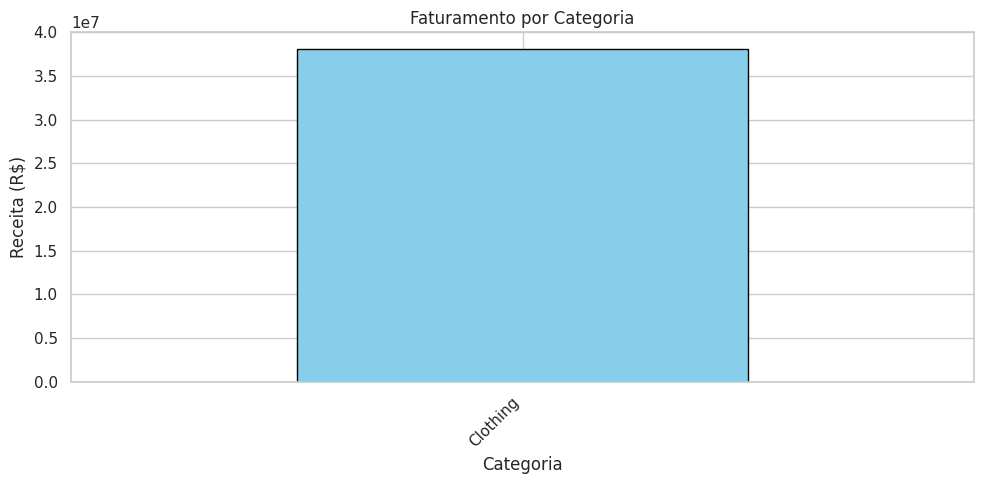

In [15]:
# ===============================
# 9. Faturamento por categoria
# ===============================
rev_categoria = df.groupby("Product Category")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
rev_categoria.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Faturamento por Categoria")
plt.ylabel("Receita (R$)")
plt.xlabel("Categoria")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()